##### Train model to predict images of cats and dogs using CLASSIC L-layer model without TensorFlow / PyTouch.

In [2]:
from keras.datasets import mnist
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import PIL  # to open and get Image's size
import os
from glob import glob
import pathlib  # For defining data path 
from keras.utils import to_categorical # convert your class labels into one-hot encoded vectors,

#### Step 1: Data understanding
- The dataset is downloaded from [Kaggle](https://www.kaggle.com/datasets/marquis03/cats-and-dogs/data)
- Set up file path
- Check image shape
- Check no. of output classes to decide whether to use Binary or categorical cross-entropy

In [3]:
# Read csv file:
train_df = pd.read_csv("train.csv")
val_df = pd.read_csv("val.csv")
train_df

,image:FILE,category
0,train/cat/Sphynx_159_jpg.rf.022528b23ac690c34a...,0
1,train/cat/Persian_139_jpg.rf.0e67f7e0a76dc49d0...,0
2,train/cat/Bengal_150_jpg.rf.05c93a40014062c5ae...,0
3,train/cat/Bombay_140_jpg.rf.15757f698af74453f3...,0
4,train/cat/Persian_128_jpg.rf.16da80c477d1ca2bc...,0
...,...,...
270,train/dog/scottish_terrier_128_jpg.rf.cb2c8f24...,1
271,train/dog/samoyed_149_jpg.rf.c6bf305eaa640bc12...,1
272,train/dog/english_setter_172_jpg.rf.cb3f08fd8d...,1
273,train/dog/shiba_inu_135_jpg.rf.ca95dbdfbdf5b08...,1


- Based on result above, cat = 0, dog = 1.

In [4]:
# Extract file paths (x) and labels (Y) for train dataset
image_paths = train_df['image:FILE'].values
labels = train_df['category'].values

# Initialize empty lists for images (cat and dog) and their corresponding labels (0 and 1)
images = []
image_labels = []

# Set image target size
size = (300, 300)

# Loop through all the images & labels and read them using PIL
for path, label in zip(image_paths, labels):
    # Construct the full image path  (cwd() - get current working dir = Binary Cross-Entropy folder)
    img_path = os.path.join(os.getcwd(), path)  
    # Result: img_path = Binary Cross-Entropy/train/cat/.img & Binary Cross-Entropy/train/cat/.img corresponding labels

    # Read the image using PIL (Pillow)
    img = PIL.Image.open(img_path)  # Open the image

    if img is not None:  # Check if image was successfully loaded
        img = img.resize(size) # set (300,300) dimension
        images.append(img)  # Add image to the list
        image_labels.append(label)  # Add label to the list

# Convert the list of images and labels into NumPy arrays
train_images = np.array([np.array(img) for img in images])  # Convert each image to a NumPy array
train_labels = np.array(image_labels)  # Convert labels to NumPy array

In [5]:
# Extract file paths (x) and labels (Y) for validation dataset
image_paths = val_df['image:FILE'].values
labels = val_df['category'].values

# Initialize empty lists for images (cat and dog) and their corresponding labels (0 and 1)
images = []
image_labels = []

# Set image target size
size = (300, 300)

# Loop through all the images & labels and read them using PIL
for path, label in zip(image_paths, labels):
    img_path = os.path.join(os.getcwd(), path)  
    img = PIL.Image.open(img_path)  

    if img is not None:  # Check if image was successfully loaded
        img = img.resize(size)
        images.append(img)  # Add image to the list
        image_labels.append(label)  # Add label to the list

# Convert the list of images and labels into NumPy arrays
val_images = np.array([np.array(img) for img in images]) 
val_labels = np.array(image_labels) 

In [6]:
# Check image dimesnions and shapes:
# Train images and labels arrays
print("Total number of train images: ", train_images.shape[0])  
print("Total number of train images labels (0 and 1): ", train_labels.shape[0])  
print("Train images dimension: ", train_images.shape[1:]) 
print("-------------------------------------")

# Validaiton images and labels arrays
print("Total number of validation images: ", val_images.shape[0])  
print("Total number of validation images labels (0 and 1): ", val_labels.shape[0])  
print("Validation images dimension: ", val_images.shape[1:]) 
print("-------------------------------------")

# Trian and validation images shapes
print("train_images shape: " + str(train_images.shape))
print("train_labels shape: " + str(train_labels.shape))
print("val_images shape: " + str(val_images.shape))
print("val_labels shape: " + str(val_labels.shape))


Total number of train images:  275
Total number of train images labels (0 and 1):  275
Train images dimension:  (300, 300, 3)
-------------------------------------
Total number of validation images:  70
Total number of validation images labels (0 and 1):  70
Validation images dimension:  (300, 300, 3)
-------------------------------------
train_images shape: (275, 300, 300, 3)
train_labels shape: (275,)
val_images shape: (70, 300, 300, 3)
val_labels shape: (70,)


- In order for Dense layers to work later, we need to **flatten** the images (300x300x3) into 270k-dimensional vectors.

In [7]:
train_labels[:120]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [8]:
# Check output classes
total_classes = np.unique(train_labels)
number_of_total_classes = len(total_classes)
print('Total number of output classes : ', number_of_total_classes)
print('All Output classes : ', total_classes)

Total number of output classes :  2
All Output classes :  [0 1]


- Since we have 2 output classes (neurons), we will use **Binary Cross-Entropy** as our loss function.

$$\text{Binary Cross-Entropy} = - \left[ y \log(p) + (1 - y) \log(1 - p) \right]$$


#### Binary cross-entropy vs Categorical cross-entropy loss functions
- **Binary CE (Sigmoid):** Binary Classification (2 classes only)
    - Example usage: Classifying images of "spam" or "not spam" labels  or whether an image is of a "cat" or "dog".
    
$$\text{Binary Cross-Entropy} = - \left[ y \log(p) + (1 - y) \log(1 - p) \right]$$

- where:
    - $p =$ true label $∈{0,1}$
    - $p =$ predicted probability of class 1 (e.g "spam").
    - It is Bernoulli target:
        - if $p > 0.5$, model predicts as spam (class 1)
        - if $p < 0.5$, model predicts as not spam (class 0)
        - Output neuron: one only.

- **Categorical CE (Softmax):** Multi-class Classification (more than 2 classes)
    - Example usage: classifying image of "cat", "dog", and "bird" or digit classification (0 - 9).
    - Exactly one class is true among $C$ classes
    - Output neurons: number of $C$ classes

$$\text{Categorical Cross-Entropy} = - \sum_{i=1}^{C} y_i \log(p_i)$$

- where:
    - $C =$ number of class
    - $y_i =$ true label in one-hot encoded vector (0 or 1).
    - $p_i =$ predicted probability of class i.


Text(0.5, 1.0, 'Label : 1')

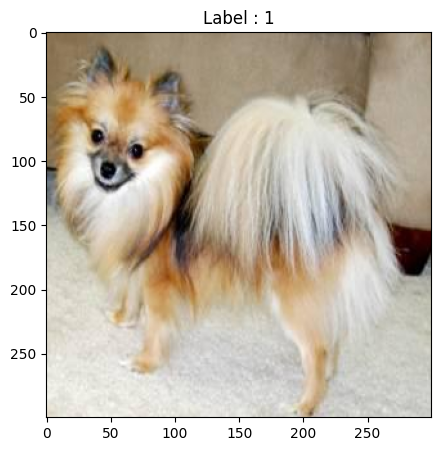

In [9]:
# Display the first image in testing data 
plt.figure(figsize=[10,5])

plt.imshow(val_images[67,:,:], cmap='gray') # shows index 1 image of size 300x300 pixels 
plt.title(f"Label : {val_labels[67]}")

#### Step 2: Data Preprocessing: 

In [10]:
# Resahpe from an array of dimension 28x28 to array of dimention 784 so that it becomes 2D array. 
train_x = train_images.reshape(train_images.shape[0], -1) # -1 will automatically be calculated into 28 * 28
val_x = val_images.reshape(val_images.shape[0], -1)

# Standardize data to have feature values between 0 and 1. (255 is max pixel value for 8-bit image)
train_x = train_x/255.
val_x = val_x/255.

print(train_x.shape)
print(val_x.shape)

(275, 270000)
(70, 270000)


#### Step 3: Build Model: **L-Layer Model**

- $[LINEAR -> RELU]\times(L-1) -> LINEAR -> SOFTMAX$
    - where:
        - $L$: Total number of layers
        - $L-1$: Total number of Hidden layers


- Example usage:
    - If L = 5 layers (L-1 = 4 hidden layers), 

        - Hidden Layer 1: [LINEAR -> RELU]

        - Hidden Layer 2: [LINEAR -> RELU]

        - Hidden Layer 3: [LINEAR -> RELU]
        
        - Hidden Layer 4: [LINEAR -> RELU]
        - Output Layer: LINEAR -> SOFTMAX
- Linear activation function `f(x)=x`: output is directly proportional to the input. (output is same as input).

- RELU (Rectified Linear Unit) `f(x)=max(0,x)`: It is a non-linear activation function that transforms any nagtive input to 0. 

- SIGMOID $f(x) = \frac{1}{1 + e^{-x}}​$: It is a non-linear activation function that output values between 0 and 1. 
    - Where if `f(x)` > 0.5 = cat (1).
    - Or if `f(x)` < 0.5 = dog (0).

- Define the layers: 

    - `layers_dims = [n_x, n_h, n_h, n_h, n_y]` 
    - Input layer `(n_x)`: The number of input features (784).

    - Hidden layers `(n_h)`: The number of hidden neurons in the hidden layer (128).
        - Numbers can be `32, 64, 128, 256`. 
        - If we give too high number of neurons (256 etc), then model may **overfit**.

    - Output layer `(n_y)`: The number of output neurons (10) since we have 10 numbers.

In [49]:
layers_dims = [784, 128, 64, 32, 10]  # 5-layer model

In [50]:
def initialize_parameters(n_x, n_h, n_y):
    np.random.seed(7)  # For reproducibility
    
    # Initialize weights and biases for the layers
    W1 = np.random.randn(n_h, n_x) * 0.01  # Weight for the first layer (size: n_h x n_x)
    b1 = np.zeros((n_h, 1))  # Bias for the first layer (size: n_h x 1)
    
    W2 = np.random.randn(n_y, n_h) * 0.01  # Weight for the second layer (size: n_y x n_h)
    b2 = np.zeros((n_y, 1))  # Bias for the second layer (size: n_y x 1)

    # Check the shape if it is correct
    assert(W1.shape == (n_h, n_x))
    assert(b1.shape == (n_h, 1))
    assert(W2.shape == (n_y, n_h))
    assert(b2.shape == (n_y, 1))
    # Store parameters in a dictionary to return
    parameters = {"W1": W1, "b1": b1, "W2": W2, "b2": b2}
    
    return parameters

In [51]:
def sigmoid(Z):
    
    A = 1/(1+np.exp(-Z))
    cache = Z
    
    return A, cache

def relu(Z):
    
    A = np.maximum(0,Z)
    
    assert(A.shape == Z.shape)
    
    cache = Z 
    return A, cache

In [52]:
def linear_forward(A, W, b):
    Z = W.dot(A) + b
    
    assert(Z.shape == (W.shape[0], A.shape[1]))
    cache = (A, W, b)

    return Z, cache

def linear_backward(dZ, cache):
    A_prev, W, b = cache
    m = A_prev.shape[1]

    dW = 1./m * np.dot(dZ,A_prev.T)
    db = 1./m * np.sum(dZ, axis = 1, keepdims = True)
    dA_prev = np.dot(W.T,dZ)

    assert (dA_prev.shape == A_prev.shape)
    assert (dW.shape == W.shape)
    assert (db.shape == b.shape)

    return dA_prev, dW, db

In [53]:
def relu_backward(dA, cache):
    
    Z = cache
    dZ = np.array(dA, copy=True) # just converting dz to a correct object.
    
    # When z <= 0, you should set dz to 0 as well. 
    dZ[Z <= 0] = 0
    
    assert (dZ.shape == Z.shape)
    
    return dZ

def sigmoid_backward(dA, cache):
    Z = cache
    
    s = 1/(1+np.exp(-Z))
    dZ = dA * s * (1-s)
    
    assert (dZ.shape == Z.shape)
    
    return dZ


In [54]:
def linear_activation_forward(A_prev, W, b, activation):

    if activation == "sigmoid":
        # Inputs: "A_prev, W, b". Outputs: "A, activation_cache".
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = sigmoid(Z)
    
    elif activation == "relu":
        # Inputs: "A_prev, W, b". Outputs: "A, activation_cache".
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = relu(Z)
    
    assert (A.shape == (W.shape[0], A_prev.shape[1]))
    cache = (linear_cache, activation_cache)

    return A, cache

$$\text{Binary Cross-Entropy} = - \left[ y \log(p) + (1 - y) \log(1 - p) \right]$$

In [ ]:
# Binary Cross-Entropy Loss
def compute_cost(AL, Y):
    m = Y.shape[1]

    # Compute loss from aL and y.
    cost = (1./m) * (-np.dot(Y,np.log(AL).T) - np.dot(1-Y, np.log(1-AL).T))
    
    cost = np.squeeze(cost)      # To make sure your cost's shape is what we expect (e.g. this turns [[17]] into 17).
    assert(cost.shape == ())
    
    return cost


In [56]:
def linear_activation_backward(dA, cache, activation):
    linear_cache, activation_cache = cache
    
    if activation == "relu":
        dZ = relu_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)
        
    elif activation == "sigmoid":
        dZ = sigmoid_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)
    
    return dA_prev, dW, db


In [57]:
def update_parameters(parameters, grads, learning_rate):
    L = len(parameters) // 2 # number of layers in the neural network

    # Update rule for each parameter. Use a for loop.
    for l in range(L):
        parameters["W" + str(l+1)] = parameters["W" + str(l+1)] - learning_rate * grads["dW" + str(l+1)]
        parameters["b" + str(l+1)] = parameters["b" + str(l+1)] - learning_rate * grads["db" + str(l+1)]
        
    return parameters


In [60]:
def initialize_parameters_deep(layer_dims):
    
    np.random.seed(1)
    parameters = {}
    L = len(layer_dims)            # number of layers in the network

    for l in range(1, L):
        parameters['W' + str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1]) / np.sqrt(layer_dims[l-1]) #*0.01
        parameters['b' + str(l)] = np.zeros((layer_dims[l], 1))
        
        assert(parameters['W' + str(l)].shape == (layer_dims[l], layer_dims[l-1]))
        assert(parameters['b' + str(l)].shape == (layer_dims[l], 1))

        
    return parameters

In [68]:
def L_model_forward(X, parameters):
    caches = []
    A = X
    L = len(parameters) // 2                  # number of layers in the neural network
    
    # Implement [LINEAR -> RELU]*(L-1). Add "cache" to the "caches" list.
    for l in range(1, L):
        A_prev = A 
        A, cache = linear_activation_forward(A_prev, parameters['W' + str(l)], parameters['b' + str(l)], activation = "relu")
        caches.append(cache)
    
    # Implement LINEAR -> SIGMOID. Add "cache" to the "caches" list.
    AL, cache = linear_activation_forward(A, parameters['W' + str(L)], parameters['b' + str(L)], activation = "sigmoid")
    caches.append(cache)
    
    assert(AL.shape == (1,X.shape[1]))
            
    return AL, caches

In [58]:
# Initialize parameters
# n_x = 784  # Input layer size (28 * 28)
# n_h = 128  # Hidden layer size (too big = overfit, too small = underfit)
# n_y = 10    # Output layer size (binary classification)

def L_layer_model(X, Y, layers_dims, learning_rate = 0.007, num_iterations = 3000, print_cost=False):
    np.random.seed(1)
    costs = []                         # keep track of cost
    
    # Parameters initialization.
    ### START CODE HERE ###
    parameters = initialize_parameters_deep(layers_dims)
    ### END CODE HERE ###
    
    # Loop (gradient descent)
    for i in range(0, num_iterations):

        # Forward propagation: [LINEAR -> RELU]*(L-1) -> LINEAR -> SIGMOID.
        ### START CODE HERE ### (≈ 1 line of code)
        AL, caches = L_model_forward(X, parameters)
        ### END CODE HERE ###
        
        # Compute cost.
        ### START CODE HERE ### (≈ 1 line of code)
        cost = compute_cost(AL, Y)
        ### END CODE HERE ###
    
        # Backward propagation.
        ### START CODE HERE ### (≈ 1 line of code)
        grads = L_model_backward(AL, Y, caches)
        ### END CODE HERE ###
 
        # Update parameters.
        ### START CODE HERE ### (≈ 1 line of code)
        parameters = update_parameters(parameters, grads, learning_rate=learning_rate)
        ### END CODE HERE ###
                
        # Print the cost every 100 training example
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
        if print_cost and i % 100 == 0:
            costs.append(cost)
            
    # plot the cost
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters



In [71]:
X_try = (12288, 218)
y_try = (1, 218)
parameters = L_layer_model(X_try, y_try, layers_dims, num_iterations = 250, print_cost = True)

ValueError: shapes (128,784) and (2,) not aligned: 784 (dim 1) != 2 (dim 0)

#### Testing model's prediction

In [ ]:
def predict(X, y, parameters):
    """
    X: Input data (images) of shape (784)
    y: One-hot encoded labels of shape (10)
    parameters: Dictionary containing your trained W1, b1, W2, b2
    """
    m = X.shape[0]
    
    # 1. Forward pass to get probabilities (A2)
    # Note: We transpose X to (784, m) for the forward pass
    A1, _ = linear_activation_forward(X.T, parameters["W1"], parameters["b1"], activation="relu")
    A2, _ = linear_activation_forward(A1, parameters["W2"], parameters["b2"], activation="sigmoid")
    
    # 2. Convert probabilities to class labels (0-9)
    # axis=0 because A2 is (10, m). It picks the row index with highest value for each example.
    predictions = np.argmax(A2, axis=0)
    
    # 3. Convert one-hot ground truth labels back to digits for comparison
    true_labels = np.argmax(y.T, axis=0)
    
    # 4. Calculate accuracy
    accuracy = np.mean(predictions == true_labels)
    
    print(f"Accuracy: {accuracy * 100:.2f}%")
    
    return predictions

In [ ]:
print("--- Training Accuracy ---")
p_train = predict(train_x, train_y, parameters)

print("\n--- Test Accuracy ---")
p_test = predict(test_x, test_y, parameters)

--- Training Accuracy ---
Accuracy: 90.67%

--- Test Accuracy ---
Accuracy: 91.19%


- Based on the results above, the model has learned the actual patterns of the digits rather than just memorizing the training images. However, since both accuracy is at 90%, which indicates **High bias**, the model has not train long enough to capture finer details of the digits. 

- Possible Improvements:
    - Increase the Epouch (from 500 to 1000) and hiddden layer size(from 128 to 256).
    - Decrease learning rate size (from 0.1 to 0.001) to hit the minimum cost as close as possble.
    - Add a 3rd layer (input -> hidden 1 -> hidden 2 -> output).

#### Building L-Layer Model
- *[LINEAR -> RELU]$\times$(L-1) -> LINEAR -> SIGMOID*

In [64]:
def initialize_parameters_deep(layer_dims):
    np.random.seed(3)
    parameters = {}
    L = len(layer_dims)            

    for l in range(1, L):
        # He Initialization (recommended for ReLU)
        parameters['W' + str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1]) * np.sqrt(2/layer_dims[l-1])
        parameters['b' + str(l)] = np.zeros((layer_dims[l], 1))
        
    return parameters

In [62]:
def L_model_forward(X, parameters):
    caches = []
    A = X
    L = len(parameters) // 2   # number of layers
    
    # Implement [LINEAR -> RELU]*(L-1)
    for l in range(1, L):
        A_prev = A 
        A, cache = linear_activation_forward(A_prev, parameters['W' + str(l)], parameters['b' + str(l)], activation="relu")
        caches.append(cache)
    
    # Implement LINEAR -> SIGMOID (Output Layer)
    AL, cache = linear_activation_forward(A, parameters['W' + str(L)], parameters['b' + str(L)], activation="sigmoid")
    caches.append(cache)
            
    return AL, caches

In [63]:
def L_model_backward(AL, Y, caches):
    grads = {}
    L = len(caches) # number of layers
    m = AL.shape[1]
    
    # Initializing the backpropagation (Direct dZ for Output Layer)
    dZL = AL - Y.T
    
    # Lth layer (SIGMOID -> LINEAR) gradients
    current_cache = caches[L-1] # The last cache
    A_prev, W, b, Z = current_cache
    grads["dW" + str(L)] = (1/m) * np.dot(dZL, A_prev.T)
    grads["db" + str(L)] = (1/m) * np.sum(dZL, axis=1, keepdims=True)
    grads["dA" + str(L-1)] = np.dot(W.T, dZL)
    
    # Loop from L-2 to 0 for hidden layers (RELU -> LINEAR)
    for l in reversed(range(L-1)):
        current_cache = caches[l]
        dA_prev_temp, dW_temp, db_temp = linear_activation_backward(grads["dA" + str(l+1)], current_cache, activation="relu")
        grads["dA" + str(l)] = dA_prev_temp
        grads["dW" + str(l + 1)] = dW_temp
        grads["db" + str(l + 1)] = db_temp

    return grads

In [65]:
def update_parameters(parameters, grads, learning_rate):
    """
    Update parameters using gradient descent
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    grads -- python dictionary containing your gradients, output of L_model_backward
    """
    
    L = len(parameters) // 2 # number of layers in the neural network

    # Update rule for each parameter. Use a loop because of L layers
    for l in range(L):
        parameters["W" + str(l + 1)] = parameters["W" + str(l + 1)] - learning_rate * grads["dW" + str(l + 1)]
        parameters["b" + str(l + 1)] = parameters["b" + str(l + 1)] - learning_rate * grads["db" + str(l + 1)]
        
    return parameters

In [ ]:
layers_dims = [784, 256, 128, 64, 10] # 4-layer model

def L_layer_model(X, Y, layers_dims, learning_rate, num_iterations):
    parameters = initialize_parameters_deep(layers_dims)
    costs = []
    
    for i in range(num_iterations):
        # Forward propagation
        AL, caches = L_model_forward(X.T, parameters)
        
        # Compute cost
        cost = compute_cost(AL, Y)
        
        # Backward propagation
        grads = L_model_backward(AL, Y, caches)
        
        # Update parameters
        parameters = update_parameters(parameters, grads, learning_rate)
        
        if i % 100 == 0:
            print(f"Cost after iteration {i}: {cost}")
            costs.append(cost)
            
    return parameters, costs

# Run training
parameters, costs = L_layer_model(train_x, train_y, layers_dims,  learning_rate = 0.075, num_iterations=500)

Cost after iteration 0: 0.7396354611275338
Cost after iteration 100: 0.4843130283571972
Cost after iteration 200: 0.3345520984884648
Cost after iteration 300: 0.2818175474545623
Cost after iteration 400: 0.2459830787502518


In [66]:
# L-Model Prediction:
def predict(X, y, parameters):
    """
    X: Input data (images) of shape (m, 784)
    y: One-hot encoded labels of shape (m, 10)
    parameters: Dictionary containing all trained W and b for L layers
    """
    m = X.shape[0]
    
    # 1. Use the generalized Forward Pass function
    # This automatically handles as many layers as are in your parameters dict
    # AL will be the output of the very last (sigmoid) layer
    AL, _ = L_model_forward(X.T, parameters)
    
    # 2. Convert probabilities to class labels (0-9)
    # axis=0 because AL shape is (10, m)
    predictions = np.argmax(AL, axis=0)
    
    # 3. Convert one-hot ground truth labels back to digits for comparison
    # train_y/test_y are (m, 10), so we check axis 1
    true_labels = np.argmax(y, axis=1)
    
    # 4. Calculate accuracy
    accuracy = np.mean(predictions == true_labels)
    
    print(f"Accuracy: {accuracy * 100:.2f}%")
    
    return predictions

In [67]:
# Assuming your layers_dims was [784, 128, 64, 10]
print("--- L-layer Model Training Accuracy ---")
p_train = predict(train_x, train_y, parameters)

print("\n--- L-layer Model Test Accuracy ---")
p_test = predict(test_x, test_y, parameters)

--- L-layer Model Training Accuracy ---


NameError: name 'parameters' is not defined

- As you can see, L-layer model has higher accuracy than 2 layer model of about 4% increment.

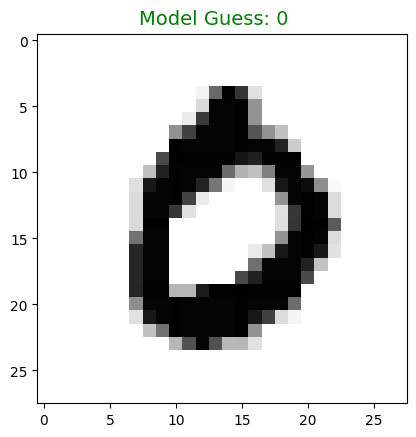

In [ ]:
# User testing
COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

def predict_single(parameters, image, correct_label):
    # 1. Preprocess the image: Flatten and Normalize
    # Reshape from (28, 28) to (784, 1) and scale to 0-1
    processed_image = image.reshape(784, 1) / 255.0
    
    # 2. Forward Pass using your manual function
    # AL will be the output layer (probabilities for each digit)
    AL, _ = L_model_forward(processed_image, parameters)
    
    # 3. Get the prediction
    prediction_index = np.argmax(AL, axis=0)[0]
    predicted_class = class_names[prediction_index]
    
    # 4. Show the result
    show_image(image, class_names[correct_label], predicted_class)

def show_image(img, label, guess):
    plt.imshow(img, cmap=plt.cm.binary)
    plt.title("Expected: " + label)
    # Using a colored text for the prediction to make it stand out
    plt.figtext(0.5, 0.90, f"Model Guess: {guess}", ha='center', fontsize=14, 
                color='green' if label == guess else 'red')
    plt.show()

def get_number():
    while True:
        num = input("Pick a number (0-9999): ")
        if num.isdigit():
            num = int(num)
            if 0 <= num < 10000:
                return num
        print("Try again...")

# --- Execution ---
num = get_number()
image = test_images[num]   # Original 28x28 image for plotting
label = test_labels[num]   # The integer label (0-9)
predict_single(parameters, image, label)